# Markov processes

### Task 9

Simple simulation of Markov process

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


class TransitionMatrix:

    def __init__(self, matrix):
        self.matrix = matrix
        
    def transitions(self, state):
        return self.matrix[state]
        
    @property
    def raw(self):
        return np.matrix([list(self.matrix[state][1]) for state in self.matrix], dtype=float)

        
class MarkovProces:

    def __init__(self, transition_matrix, current):
        self.transition_matrix = transition_matrix
        self.current = current

    def next_state(self):
        transitions = self.transition_matrix.transitions(self.current)
        self.current = np.random.choice(a=list(transitions[0]), p=list(transitions[1]))

#### Calculate P^n for random n and find limit in n -> inf

In [2]:
def is_steady_state(matrix_a, matrix_b):
    check = matrix_b - matrix_a
    return np.all(check < 10 ** (-5))


def find_steady_state(matrix, power):
    powers = []
    current = matrix
    steady_state = None
    for n in range(1, power):
        temp = current * matrix
        if not steady_state and is_steady_state(current, temp):
            steady_state = n
        current = temp
        powers.append(temp)
    return {"steady_state": steady_state, "powers": powers}

Steady state was found at n equal to 22


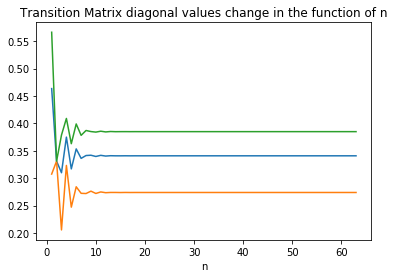

In [3]:
transitions = {'A': np.array([['A', 'B', 'C'], [0.0, 0.16, 0.84]]),
               'B': np.array([['A', 'B', 'C'], [0.64, 0.0, 0.36]]),
               'C': np.array([['A', 'B', 'C'], [0.43, 0.57, 0.0]])}

matrix = TransitionMatrix(transitions)
steady_state = find_steady_state(matrix.raw, 64)

if steady_state["steady_state"]:
    print("Steady state was found at n equal to " + str(steady_state["steady_state"]))
else:
    print("Steady state was not found... try with higher power")
    
plt.figure()
plt.plot(np.arange(1, 64), [np.array(matrix.diagonal())[0] for matrix in steady_state["powers"]])
plt.title("Transition Matrix diagonal values change in the function of n")
plt.xlabel("n")
plt.show()    

#### Evolution of the system

In [4]:
def simulate_system(process, times):
    for _ in range(times):
        process.next_state()
    return process.current


def get_shares_of_results(times, matrix, initial_state):
    process = MarkovProces(matrix, initial_state)
    results = np.array([simulate_system(process, steady_state["steady_state"]) for _ in range(times)])
    states, counts = np.unique(results, return_counts=True)
    for index, state in enumerate(list(states)):
        print("Share of state '" + str(state) + "' after", times, "tests equals", counts[index]/times)
    plt.bar(states, counts)
    plt.show()

Share of state 'A' after 10000 tests equals 0.339
Share of state 'B' after 10000 tests equals 0.2827
Share of state 'C' after 10000 tests equals 0.3783


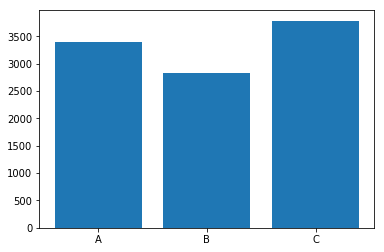

In [5]:
N = 10 ** 4
get_shares_of_results(N, matrix, "A")

Share of state 'A' after 10000 tests equals 0.3447
Share of state 'B' after 10000 tests equals 0.2722
Share of state 'C' after 10000 tests equals 0.3831


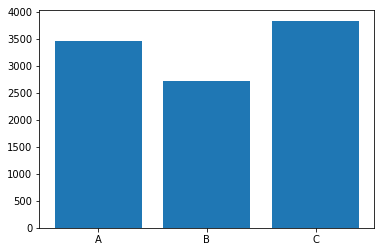

In [6]:
get_shares_of_results(N, matrix, "B")

Share of state 'A' after 10000 tests equals 0.34
Share of state 'B' after 10000 tests equals 0.2729
Share of state 'C' after 10000 tests equals 0.3871


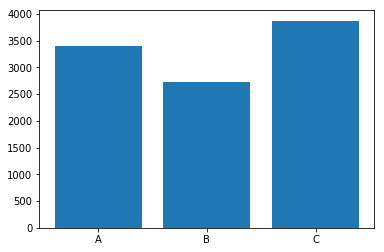

In [7]:
get_shares_of_results(N, matrix, "C")